# Explore ZLL processor output
- processes an `events[year][ch][sample]` object using `make_events_dict()` from zll processed parquets
- uses `plot_hists()` to make stacked histograms

In [2]:
import glob
import os
import json
import pickle
import yaml

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
! ls ../eos/zll_Pt_2017

DYJetsToLL_M-10to50                     SingleElectron_Run2017E
DYJetsToLL_Pt-100To250                  SingleElectron_Run2017F
DYJetsToLL_Pt-250To400                  SingleMuon_Run2017B
DYJetsToLL_Pt-400To650                  SingleMuon_Run2017C
DYJetsToLL_Pt-50To100                   SingleMuon_Run2017D
DYJetsToLL_Pt-650ToInf                  SingleMuon_Run2017E
GluGluHToTauTau                         SingleMuon_Run2017F
GluGluHToWW_Pt-200ToInf_M-125           TTTo2L2Nu
GluGluZH_HToWW_ZTo2L_M-125              TTToHadronic
HWminusJ_HToWW_M-125                    TTToSemiLeptonic
HWplusJ_HToWW_M-125                     VBFHToWWToLNuQQ_M-125_withDipoleRecoil
HZJ_HToWW_M-125                         WJetsToLNu_HT-100To200
QCD_Pt_1000to1400                       WJetsToLNu_HT-1200To2500
QCD_Pt_1400to1800                       WJetsToLNu_HT-200To400
QCD_Pt_170to300                         WJetsToLNu_HT-2500ToInf
QCD_Pt_1800to2400                       WJetsToLNu_HT-400To600
QCD_Pt_2400to32

In [5]:
presel = {
    "mu": {
        "lep_fj_dr": "( ( lep_fj_dr>0.03) )",
        "n_bjets_M": "( (n_bjets_M<2) )",        
    },
    "ele": {
        "lep_fj_dr": "( ( lep_fj_dr>0.03) )",
        "n_bjets_M": "( (n_bjets_M<2) )",
    }    
}

weights = {
    "ele": {
        "weight_L1Prefiring": 1,
        "weight_genweight": 1,
        "weight_id_electron": 1,
        "weight_pileup": 1,
        "weight_reco_electron": 1,
        "weight_trigger_electron": 1,
        "weight_vjets_nominal": 1,
    },
    "mu": {
        "weight_L1Prefiring": 1,
        "weight_genweight": 1,
        "weight_id_muon": 1,
        "weight_isolation_muon": 1,
        "weight_pileup": 1,
        "weight_trigger_iso_muon": 1,
        "weight_trigger_noniso_muon": 1,
        "weight_vjets_nominal": 1   ,
    },       
}

In [6]:
years = ["2017"] #, "2016", "2016APV", "2018"]
channels = ["mu", "ele"]

samples_dir = f"../eos/zll_Pt_"

samples = [
    "HWW", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
    "Data"
]

In [7]:
from make_hists import make_events_dict
events_dict = make_events_dict(years, channels, samples_dir, samples, presel, weights, "all", add_inclusive_score=False)

Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
---> Applying preselection.
applying lep_fj_dr selection on 118 events
applying n_bjets_M selection on 47 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying weight_pileup weight
Applying weight_trigger_iso_muon weight
Applying weight_trigger_noniso_muon weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the WJetsLNu dataframe with the remaining 47 events
tot event weight 73.63512371073823 

Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
---> Applying preselection.
applying lep_fj_dr selection on 467091 events
applying n_bjets_M selection on 441500 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight

---> Applying preselection.
applying lep_fj_dr selection on 103933 events
applying n_bjets_M selection on 92748 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying weight_pileup weight
Applying weight_trigger_iso_muon weight
Applying weight_trigger_noniso_muon weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the DYJets dataframe with the remaining 91938 events
tot event weight 15175.323618940856 

Finding QCD_Pt_1800to2400 samples and should combine them under QCD
---> Applying preselection.
applying lep_fj_dr selection on 703 events
applying n_bjets_M selection on 484 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applyin

Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying weight_pileup weight
Applying weight_trigger_iso_muon weight
Applying weight_trigger_noniso_muon weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the WZQQ dataframe with the remaining 372 events
tot event weight 28.27131361759681 

Finding SingleElectron_Run2017F samples and should combine them under Data
Finding QCD_Pt_800to1000 samples and should combine them under QCD
---> Applying preselection.
applying lep_fj_dr selection on 1806 events
applying n_bjets_M selection on 1101 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying weight_pileup weight
Applying weight_trigger_iso_muon weight
Applying weight_trigger_noniso_muon weight
weig

---> Applying preselection.
applying lep_fj_dr selection on 2271864 events
applying n_bjets_M selection on 1886285 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the DYJets dataframe with the remaining 1863624 events
tot event weight 12556.972965092404 

Finding ST_t-channel_top_4f_InclusiveDecays samples and should combine them under SingleTop
---> Applying preselection.
applying lep_fj_dr selection on 312 events
applying n_bjets_M selection on 274 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_e

Finding QCD_Pt_1800to2400 samples and should combine them under QCD
Finding SingleMuon_Run2017E samples and should combine them under Data
Finding SingleMuon_Run2017B samples and should combine them under Data
Finding WW samples and should combine them under Diboson
---> Applying preselection.
applying lep_fj_dr selection on 1461 events
applying n_bjets_M selection on 544 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the Diboson dataframe with the remaining 543 events
tot event weight 101.82931654979372 

Finding ST_t-channel_antitop_4f_InclusiveDecays samples and should combine them under SingleTop
---> Applying preselection.
applying lep_fj_dr selecti

---> Applying preselection.
applying lep_fj_dr selection on 882014 events
applying n_bjets_M selection on 721153 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the DYJets dataframe with the remaining 716931 events
tot event weight 32859.75934914464 

Finding SingleMuon_Run2017F samples and should combine them under Data


# Plot histograms

## 1d-hists

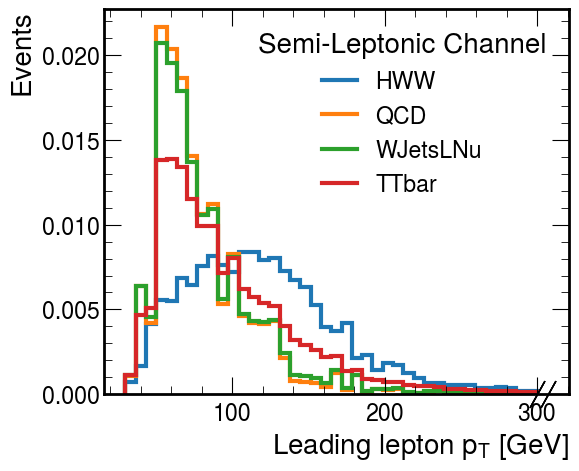

In [8]:
zll_axis_dict = {
    "fj_pt": hist2.axis.Regular(30, 200, 1000, name="var", label=r"Jet $p_T$ [GeV]", overflow=True),
    "fj_msoftdrop": hist2.axis.Regular(35, 20, 250, name="var", label=r"Jet $m_{sd}$ [GeV]", overflow=True),    
    "lep1_pt": hist2.axis.Regular(40, 30, 300, name="var", label=r"Leading lepton $p_T$ [GeV]", overflow=True),
    "lep2_pt": hist2.axis.Regular(40, 30, 300, name="var", label=r"Second lepton $p_T$ [GeV]", overflow=True),
    "mll": hist2.axis.Regular(40, 0, 160, name="var", label=r"Zmass [GeV]", overflow=True),
}

samples_to_plot = [
    "HWW", 
#     "VH",
#     "VBF",
#     "ttH",
    "QCD",
#     "DYJets",
    "WJetsLNu",
    "TTbar",
]

### Example of a 1-d histogram
# make simple 1d-histogram of `lep_pt`
plt.rcParams.update({"font.size": 20})

var = "lep1_pt"

h = hist2.Hist(
    zll_axis_dict[var],
)

fig, ax = plt.subplots(figsize=(6, 5))

for sample in samples_to_plot:
    
    for year in years:
        for ch in channels:

            df = events_dict[year][ch][sample]

            # tagger cut
    #         df = df[df["inclusive_score"]>0.9]
    #         df = df[df["fj_bjets"]<0.3]
    #         df = df[(df["rec_W_lnu_pt"]/df["rec_W_qq_pt"])<4.8]

            h.fill(
                var=df[var],
                weight=df["event_weight"]
            )

    hep.histplot(
        h,
        ax=ax,
        label=sample,
        linewidth=3,
        density=True
    )

ax.legend(title=f"Semi-Leptonic Channel")
ax.set_ylabel("Events");  

## Stacked hists

In [12]:
vars_to_plot = [
#     "fj_pt",
#     "fj_msoftdrop",    
    "lep1_pt",
#     "lep2_pt",
    "mll",
]

samples_to_plot = [
    "HWW", 
    "VH",
#     "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
    "Data",
]

zll_axis_dict = {
    "fj_pt": hist2.axis.Regular(30, 200, 1000, name="var", label=r"Jet $p_T$ [GeV]", overflow=True),
    "fj_msoftdrop": hist2.axis.Regular(35, 20, 250, name="var", label=r"Jet $m_{sd}$ [GeV]", overflow=True),    
    "lep1_pt": hist2.axis.Regular(40, 30, 300, name="var", label=r"Leading lepton $p_T$ [GeV]", overflow=True),
    "lep2_pt": hist2.axis.Regular(40, 30, 300, name="var", label=r"Second lepton $p_T$ [GeV]", overflow=True),
    "mll": hist2.axis.Regular(40, 0, 160, name="var", label=r"Zmass [GeV]", overflow=True),
}

In [13]:
channels = ["ele", "mu"]
# channels = ["ele"]

# fill histograms
hists = {}
for var in vars_to_plot:
            
    hists[var] = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        zll_axis_dict[var],
    )
        
    for sample in samples_to_plot:
        
        for year in years:
            for ch in channels:
                df = events_dict[year][ch][sample]

    #             df = df[df["lep_fj_dr"]>0.03]        
    #             df = df[df["n_bjets_M"]<2]

                hists[var].fill(
                    samples=sample,
                    var=df[var],
                    weight=df["event_weight"]
                ) 

Will plot lep1_pt histogram
Will plot mll histogram


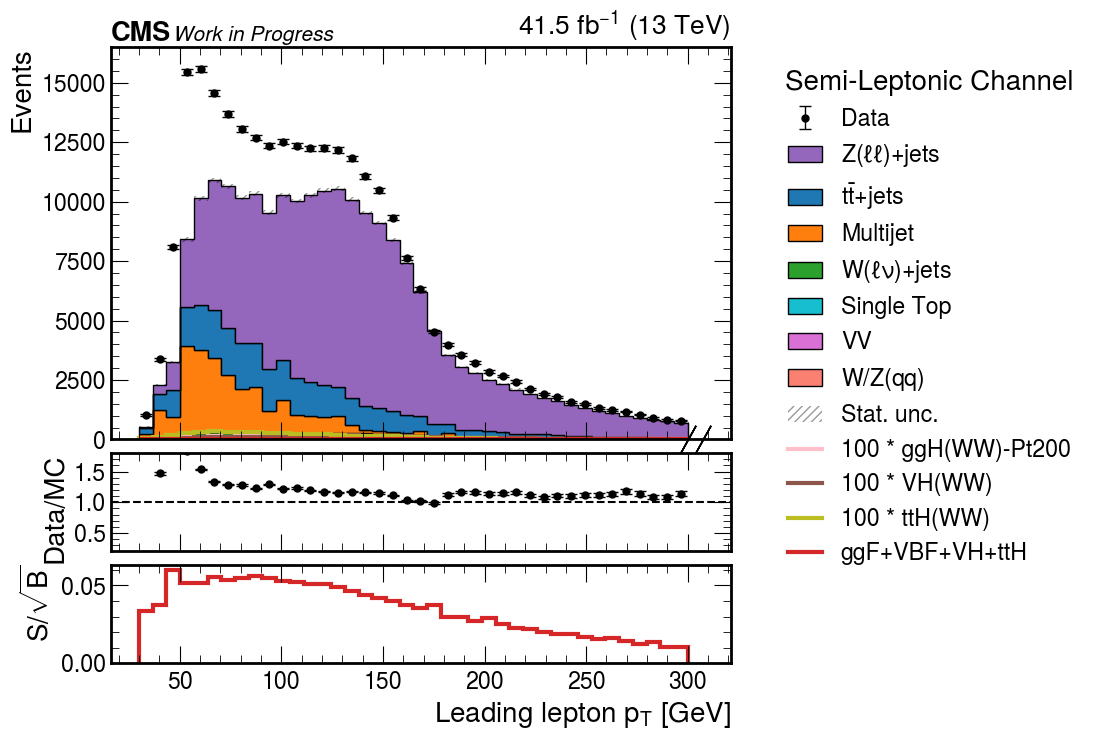

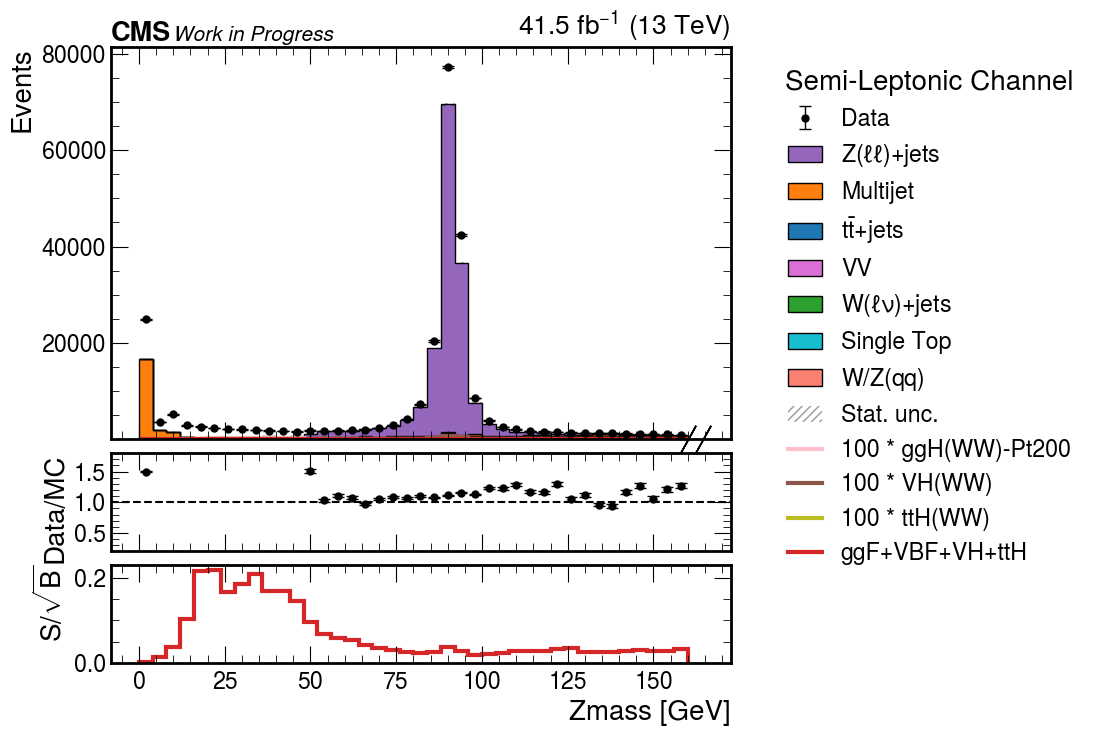

In [14]:
plt.rcParams.update({"font.size": 20})
from utils import plot_hists
plot_hists(years, channels, hists, vars_to_plot,             
            add_data=True,
            logy=False,
            add_soverb=True,
            only_sig=False,
            mult=100,
            outpath="/Users/fmokhtar/Desktop/farakiko/")